In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
import numpy as np
import os

In [2]:
IMAGE_SHAPE = (128, 128, 3)
CLASS_ONE = "Mundo4"

TRAIN_DATA_FILES = ["./DataNous/Caso_Facil/Entrenamiento/Mundo4/*.png", "./DataNous/Caso_Facil/Entrenamiento/Mundo7/*.png"]
VALIDATION_DATA_FILES = ["./DataNous/Caso_Facil/Validacion/Mundo4/*.png", "./DataNous/Caso_Facil/Validacion/Mundo7/*.png"]

CHECKPOINTS = "./DataNous/Caso_Facil/Checkpoints/Caso_Facil_{epoch:04d}.h5"

BATCH_SIZE = 32

In [18]:
'''
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=IMAGE_SHAPE))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))


model.add(Conv2D(64, (3, 3), input_shape=IMAGE_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.1))


model.add(Conv2D(128, (3,3), input_shape=IMAGE_SHAPE))
model.add(Activation('relu'))
model.add(Dropout(rate=0.1))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Dropout
model.add(Dropout(rate=0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary() '''

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), strides=(2,2), padding='same', input_shape=IMAGE_SHAPE))
model.add(tf.keras.layers.Conv2D(32, (3,3), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16385     
Total params: 39,969
Trainable params: 39,969
Non-trainable params: 0
_________________________________________________________________


In [5]:
def process_dataset(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    label = parts[-2]
    label = label == CLASS_ONE
    label = tf.cast(label, dtype=tf.float32)

    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image)
    image = tf.image.resize(image, (128, 128))
    image = (tf.image.convert_image_dtype(image, tf.float32) / 127.5) - 1

    return image, label

In [6]:
train_dataset = tf.data.Dataset.list_files(TRAIN_DATA_FILES)
train_dataset = train_dataset.map(process_dataset, tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1024, reshuffle_each_iteration=True)
train_dataset = train_dataset.batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

validation_dataset = tf.data.Dataset.list_files(VALIDATION_DATA_FILES)
validation_dataset = validation_dataset.map(process_dataset, tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [20]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
Loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=Optimizer,
               loss=Loss,
               metrics=['binary_accuracy'])

checkpoints = tf.keras.callbacks.ModelCheckpoint(CHECKPOINTS,
                                                 save_best_only=True,
                                                 monitor='binary_accuracy')

In [8]:
initial_epochs = 10
num_batches = np.ceil(len(list(tf.data.Dataset.list_files(TRAIN_DATA_FILES))) / BATCH_SIZE)
num_batches

363.0

In [21]:
history = model.fit(x=train_dataset,
                       shuffle=True,
                       #verbose=2,
                       callbacks=[checkpoints], #, TensorBoard],
                       steps_per_epoch=num_batches,
                       epochs=10,
                       validation_data=validation_dataset,
                       initial_epoch=0)

Train for 363.0 steps, validate for 41 steps
Epoch 1/10
363/363 [==============================] - 103s 284ms/step - loss: 4.0473 - binary_accuracy: 0.5381 - val_loss: 3.6405 - val_binary_accuracy: 0.6008
Epoch 2/10
363/363 [==============================] - 95s 260ms/step - loss: 3.9378 - binary_accuracy: 0.6294 - val_loss: 3.5493 - val_binary_accuracy: 0.6837
Epoch 3/10
363/363 [==============================] - 92s 254ms/step - loss: 3.8693 - binary_accuracy: 0.6922 - val_loss: 3.4811 - val_binary_accuracy: 0.7217
Epoch 4/10
363/363 [==============================] - 92s 252ms/step - loss: 3.7802 - binary_accuracy: 0.7105 - val_loss: 3.3834 - val_binary_accuracy: 0.7016
Epoch 5/10
363/363 [==============================] - 101s 277ms/step - loss: 3.5814 - binary_accuracy: 0.7393 - val_loss: 3.2861 - val_binary_accuracy: 0.7643
Epoch 6/10
363/363 [==============================] - 106s 291ms/step - loss: 3.5534 - binary_accuracy: 0.7521 - val_loss: 3.2645 - val_binary_accuracy: 0.776

In [23]:
history2 = model.fit(x=train_dataset,
                       shuffle=True,
                       #verbose=2,
                       callbacks=[checkpoints], #, TensorBoard],
                       steps_per_epoch=num_batches,
                       epochs=20,
                       validation_data=validation_dataset,
                       initial_epoch=10)

Train for 363.0 steps, validate for 41 steps
Epoch 11/20
363/363 [==============================] - 106s 291ms/step - loss: 3.4824 - binary_accuracy: 0.7692 - val_loss: 3.2303 - val_binary_accuracy: 0.7899
Epoch 12/20
363/363 [==============================] - 105s 288ms/step - loss: 3.4732 - binary_accuracy: 0.7709 - val_loss: 3.2218 - val_binary_accuracy: 0.7922
Epoch 13/20
363/363 [==============================] - 107s 294ms/step - loss: 3.4691 - binary_accuracy: 0.7734 - val_loss: 3.2392 - val_binary_accuracy: 0.7930
Epoch 14/20
363/363 [==============================] - 105s 291ms/step - loss: 3.4610 - binary_accuracy: 0.7753 - val_loss: 3.1818 - val_binary_accuracy: 0.7930
Epoch 15/20
363/363 [==============================] - 104s 287ms/step - loss: 3.4534 - binary_accuracy: 0.7765 - val_loss: 3.2276 - val_binary_accuracy: 0.7930
Epoch 16/20
363/363 [==============================] - 106s 292ms/step - loss: 3.4511 - binary_accuracy: 0.7771 - val_loss: 3.1949 - val_binary_accura

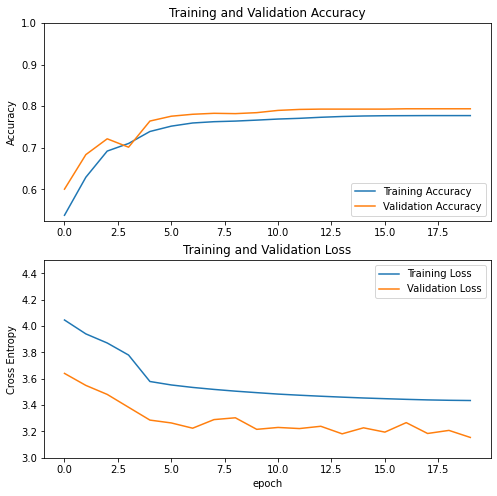

In [32]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy'] + history2.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] + history2.history['val_binary_accuracy']

loss = history.history['loss'] + history2.history['loss']
val_loss = history.history['val_loss'] + history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([3.0,4.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()